# Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

In [1]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer 
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import math
import warnings as wr
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
percentage=(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([percentage], axis=1, keys=['Percentage'])
missing_data

,Percentage
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [4]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test) 

In [7]:
knn = KNeighborsClassifier(n_neighbors=7)

In [8]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
knn.score(X_test,y_test)

0.7305194805194806

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.3032530956508921

## Görüldüğü üzere knn algoritması ols algoritmasından 2 kat daha fazla doğruluk payı ile öğrenme işlemini gerçekleştirdi.

# What are potential problems with implementing kNN on a very large dataset?

## Knn sürekli her değer için komşuları ile ilgili olan uzaklığı hesaplayıp ona göre bir sınıflandırma yaptığı için, çok büyük bir veri saklama, işleme ve karar verme süreci gerçekleştirecek. Bu da donanımı çok zorlayan bir durum.

# Describe the training set and test set accuracy as the value of K increases?



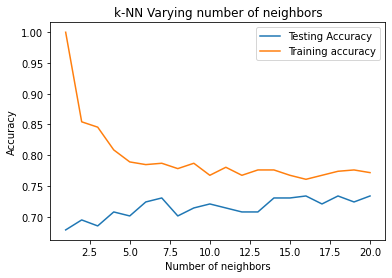

In [11]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Görüldüğü üzere k değeri bir değerden sonra çok fazla bir farklılık olmuyor. O nedenle en optimum değeri seçmek gerekir.

# Which one of the statements are true:

    - KNN performs much better if all of the data have the same scale
    - KNN works well with a small number of input variables (p), but struggles when the number of inputs is very large
    - KNN makes no assumptions about the functional form of the problem being solved

    1) Çok daha iyi bir performans gösteriri fakat bu ezberlemesine yol açar, öğrenmesine değil. Doğruluğumuz yüksek olur fakat bu çok istediğimiz bir durum değildir.
    2) Bu da doğru bir durumdur, bunun sebebini 2. soruda vermiştik.
    3) Bulunmaz, sadece en yakındakileri sınıflandırır.

# Calculate the distance between A(1,3) and B(2,3) based on Euclidean and Manhattan



    Euclidean = ((2-1)^2+(3-3)^2)^1/2=1
    Manhattan = (2-1)+(3-3)=1